# Deep Learning Project: Pet Classifier using CNN

Prepration
- Extract the ipynb file and the data in the same folder

Data Set
- A production grade program as 10,000 training images
- This is a small program with 20 images of cats and 20 images of dogs. 
- The evaluation set has 10 images of cats and 10 images of dogs

Runs
- The student is expected to run the 100-300 training step
- A production grade code would have about 20k-50k training steps

### Import modules

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, Conv2D, Input
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
import random
import sys

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
def reset_model(model, Wsave):
    model.set_weights(Wsave)

/Users/filipetheodoro/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Set hyper parameters
- Run the program with three num_steps : 100,200,300

In [2]:
reset_graph()
img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='./data/train'
testpath='./data/test'
labels = {'cats': [0,1], 'dogs': [1,0]}
fc_size=32 #size of the output of final FC layer
num_steps=[100, 200, 300] #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K
tf.logging.set_verbosity(tf.logging.INFO)

### Import the image dataset

length of train image set 40
X_data shape: (40, 32, 32, 3)
y_data shape: (40, 2)


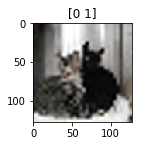

In [4]:
def read_images_classes(basepath,imgSize=img_size):
    image_stack = []
    label_stack = []

    for counter, l in enumerate(labels):
        path = os.path.join(basepath, l,'*g')
        for img in glob.glob(path):
            one_hot_vector =np.zeros(len(labels),dtype=np.int16)
            one_hot_vector[counter]=1
            image = cv2.imread(img)
            im_resize = cv2.resize(image,img_shape, interpolation=cv2.INTER_CUBIC)
            image_stack.append(im_resize)
            label_stack.append(labels[l])            
    return np.array(image_stack), np.array(label_stack)

X_train, y_train=read_images_classes(trainpath)
X_test, y_test=read_images_classes(testpath)

#test a sample image
print('length of train image set',len(X_train))
print('X_data shape:', X_train.shape)
print('y_data shape:', y_train.shape)

fig1 = plt.figure() 
ax1 = fig1.add_subplot(2,2,1) 
img = cv2.resize(X_train[0],(128,128), interpolation=cv2.INTER_CUBIC)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(y_train[0])
plt.show()

#### Normalize our data values to the range [0, 1]

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_test /= 255
X_train /= 255

## Build the model using keras

The model uses the following layers
- input layer size[32,32,3]
- conv layer 1 with 32 filters of kernel  size[5,5],
- pooling layer 1 with pool size[2,2] and stride 2
- conv layer 2 with 64 filters of kernel  size[5,5],
- pooling layer 2 with pool size[2,2] and stride 2
- dense layer whose output size is fixed in the hyper parameter: fc_size=32
- drop out layer with droput probability 0.4
- predict the class by doing a softmax on the output of the dropout layers

Training
- For training define the loss function and minimize it
- For evaluation calculate the accuracy

Reading Material
- For ideas look at tensorflow layers tutorial

### Create CNN Model

In [6]:
model = Sequential()
# X_input = model.add(Input(shape=(img_size, img_size, num_channels)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), 
                        input_shape=(img_size, img_size, num_channels), 
#                         kernel_initializer='glorot_uniform',
#                         bias_initializer='glorot_uniform',
                        activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(fc_size, activation='elu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Wsave = model.get_weights()

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                51232     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________

## Run the tensorflow model

In [11]:
result = []
for n_epoch in num_steps:
    train_history = model.fit(x=X_train, y=y_train,
                            batch_size= 16,
                            epochs=n_epoch,
                            verbose=1,
                            validation_data=(X_test, y_test)
                             )
    score = model.evaluate(X_test, y_test, verbose=0)
    reset_model(model, Wsave)
    result.append(train_history)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Train on 40 samples, validate on 20 samples
Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9357 - acc: 0.5250 - val_loss: 0.7335 - val_acc: 0.2500
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.8599 - acc: 0.4000 - val_loss: 0.9960 - val_acc: 0.5000
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7708 - acc: 0.5250 - val_loss: 0.8456 - val_acc: 0.5000
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6629 - acc: 0.6500 - val_loss: 0.7497 - val_acc: 0.5500
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6379 - acc: 0.5500 - val_loss: 0.7465 - val_acc: 0.5000
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4464 - acc: 0.7500 - val_loss: 1.3022 - val_acc: 0.5000
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7923 - acc: 0.6500 - val_loss: 1.0310 - val_acc: 0.5000
Epoch 8/100
40/40 [====================

40/40 [==============================] - 0s 1ms/step - loss: 5.2541e-04 - acc: 1.0000 - val_loss: 2.2024 - val_acc: 0.5000
Epoch 63/100
40/40 [==============================] - 0s 1ms/step - loss: 4.5605e-04 - acc: 1.0000 - val_loss: 2.2024 - val_acc: 0.5000
Epoch 64/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2068 - val_acc: 0.5000
Epoch 65/100
40/40 [==============================] - 0s 1ms/step - loss: 4.6986e-04 - acc: 1.0000 - val_loss: 2.2141 - val_acc: 0.5000
Epoch 66/100
40/40 [==============================] - 0s 1ms/step - loss: 7.5676e-04 - acc: 1.0000 - val_loss: 2.2214 - val_acc: 0.5000
Epoch 67/100
40/40 [==============================] - 0s 1ms/step - loss: 5.8445e-04 - acc: 1.0000 - val_loss: 2.2293 - val_acc: 0.5000
Epoch 68/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2363 - val_acc: 0.5000
Epoch 69/100
40/40 [==============================] - 0s 1ms/step - l

40/40 [==============================] - 0s 1ms/step - loss: 0.0075 - acc: 1.0000 - val_loss: 1.5495 - val_acc: 0.5000
Epoch 23/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0111 - acc: 1.0000 - val_loss: 1.6039 - val_acc: 0.5000
Epoch 24/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0072 - acc: 1.0000 - val_loss: 1.6529 - val_acc: 0.5000
Epoch 25/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 1.6829 - val_acc: 0.5000
Epoch 26/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 1.7050 - val_acc: 0.5000
Epoch 27/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 1.7180 - val_acc: 0.5000
Epoch 28/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.7274 - val_acc: 0.5000
Epoch 29/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0062 - acc: 1

40/40 [==============================] - 0s 1ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0930 - val_acc: 0.5500
Epoch 85/200
40/40 [==============================] - 0s 1ms/step - loss: 8.1508e-04 - acc: 1.0000 - val_loss: 2.0941 - val_acc: 0.5500
Epoch 86/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.0958 - val_acc: 0.5500
Epoch 87/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0969 - val_acc: 0.5500
Epoch 88/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.0988 - val_acc: 0.5500
Epoch 89/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.1021 - val_acc: 0.5500
Epoch 90/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.1064 - val_acc: 0.5500
Epoch 91/200
40/40 [==============================] - 0s 1ms/step - loss: 6.7935e-04 

40/40 [==============================] - 0s 1ms/step - loss: 3.8661e-04 - acc: 1.0000 - val_loss: 2.2894 - val_acc: 0.6000
Epoch 145/200
40/40 [==============================] - 0s 1ms/step - loss: 3.2753e-04 - acc: 1.0000 - val_loss: 2.2953 - val_acc: 0.6000
Epoch 146/200
40/40 [==============================] - 0s 1ms/step - loss: 5.0702e-04 - acc: 1.0000 - val_loss: 2.3016 - val_acc: 0.6000
Epoch 147/200
40/40 [==============================] - 0s 1ms/step - loss: 3.5047e-04 - acc: 1.0000 - val_loss: 2.3062 - val_acc: 0.6000
Epoch 148/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.3124 - val_acc: 0.6000
Epoch 149/200
40/40 [==============================] - 0s 1ms/step - loss: 4.3176e-04 - acc: 1.0000 - val_loss: 2.3168 - val_acc: 0.6000
Epoch 150/200
40/40 [==============================] - 0s 1ms/step - loss: 5.6429e-04 - acc: 1.0000 - val_loss: 2.3214 - val_acc: 0.6000
Epoch 151/200
40/40 [==============================] - 0s 1

40/40 [==============================] - 0s 1ms/step - loss: 1.2818 - acc: 0.5000 - val_loss: 0.7289 - val_acc: 0.4000
Epoch 4/300
40/40 [==============================] - 0s 1ms/step - loss: 0.7751 - acc: 0.5750 - val_loss: 0.6858 - val_acc: 0.5000
Epoch 5/300
40/40 [==============================] - 0s 1ms/step - loss: 0.5309 - acc: 0.7250 - val_loss: 0.8432 - val_acc: 0.5000
Epoch 6/300
40/40 [==============================] - 0s 1ms/step - loss: 0.5109 - acc: 0.7250 - val_loss: 0.8288 - val_acc: 0.5500
Epoch 7/300
40/40 [==============================] - 0s 1ms/step - loss: 0.4694 - acc: 0.7250 - val_loss: 0.9041 - val_acc: 0.4000
Epoch 8/300
40/40 [==============================] - 0s 1ms/step - loss: 0.3939 - acc: 0.8000 - val_loss: 0.7504 - val_acc: 0.4500
Epoch 9/300
40/40 [==============================] - 0s 1ms/step - loss: 0.3509 - acc: 0.8500 - val_loss: 0.8338 - val_acc: 0.6000
Epoch 10/300
40/40 [==============================] - 0s 1ms/step - loss: 0.2446 - acc: 0.9000 

Epoch 65/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.0200 - val_acc: 0.5000
Epoch 66/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.0233 - val_acc: 0.5000
Epoch 67/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.0334 - val_acc: 0.5000
Epoch 68/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0389 - val_acc: 0.5000
Epoch 69/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.0500 - val_acc: 0.5000
Epoch 70/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.0644 - val_acc: 0.5000
Epoch 71/300
40/40 [==============================] - 0s 1ms/step - loss: 5.1924e-04 - acc: 1.0000 - val_loss: 2.0763 - val_acc: 0.5000
Epoch 72/300
40/40 [==============================] - 0s 1ms/step - loss

Epoch 126/300
40/40 [==============================] - 0s 1ms/step - loss: 3.1316e-04 - acc: 1.0000 - val_loss: 2.2792 - val_acc: 0.5000
Epoch 127/300
40/40 [==============================] - 0s 1ms/step - loss: 5.2485e-04 - acc: 1.0000 - val_loss: 2.2872 - val_acc: 0.5000
Epoch 128/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.2973 - val_acc: 0.5000
Epoch 129/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.3035 - val_acc: 0.5000
Epoch 130/300
40/40 [==============================] - 0s 1ms/step - loss: 6.8290e-04 - acc: 1.0000 - val_loss: 2.3114 - val_acc: 0.5000
Epoch 131/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 2.3363 - val_acc: 0.5000
Epoch 132/300
40/40 [==============================] - 0s 1ms/step - loss: 7.6276e-04 - acc: 1.0000 - val_loss: 2.3585 - val_acc: 0.5000
Epoch 133/300
40/40 [==============================] 

40/40 [==============================] - 0s 1ms/step - loss: 2.9323e-04 - acc: 1.0000 - val_loss: 2.4952 - val_acc: 0.5000
Epoch 187/300
40/40 [==============================] - 0s 1ms/step - loss: 6.2619e-04 - acc: 1.0000 - val_loss: 2.4889 - val_acc: 0.5000
Epoch 188/300
40/40 [==============================] - 0s 1ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 2.4932 - val_acc: 0.5000
Epoch 189/300
40/40 [==============================] - 0s 1ms/step - loss: 1.3039e-04 - acc: 1.0000 - val_loss: 2.5010 - val_acc: 0.5000
Epoch 190/300
40/40 [==============================] - 0s 1ms/step - loss: 2.6093e-04 - acc: 1.0000 - val_loss: 2.5054 - val_acc: 0.5000
Epoch 191/300
40/40 [==============================] - 0s 1ms/step - loss: 3.9186e-04 - acc: 1.0000 - val_loss: 2.5057 - val_acc: 0.5000
Epoch 192/300
40/40 [==============================] - 0s 1ms/step - loss: 4.0267e-04 - acc: 1.0000 - val_loss: 2.5068 - val_acc: 0.5000
Epoch 193/300
40/40 [==============================] - 0s 1

Epoch 246/300
40/40 [==============================] - 0s 1ms/step - loss: 1.8183e-04 - acc: 1.0000 - val_loss: 2.6449 - val_acc: 0.5000
Epoch 247/300
40/40 [==============================] - 0s 1ms/step - loss: 2.8005e-04 - acc: 1.0000 - val_loss: 2.6497 - val_acc: 0.5000
Epoch 248/300
40/40 [==============================] - 0s 1ms/step - loss: 3.6070e-04 - acc: 1.0000 - val_loss: 2.6535 - val_acc: 0.5000
Epoch 249/300
40/40 [==============================] - 0s 1ms/step - loss: 4.4871e-04 - acc: 1.0000 - val_loss: 2.6535 - val_acc: 0.5000
Epoch 250/300
40/40 [==============================] - 0s 1ms/step - loss: 1.7771e-04 - acc: 1.0000 - val_loss: 2.6520 - val_acc: 0.5000
Epoch 251/300
40/40 [==============================] - 0s 1ms/step - loss: 5.3603e-04 - acc: 1.0000 - val_loss: 2.6481 - val_acc: 0.5000
Epoch 252/300
40/40 [==============================] - 0s 1ms/step - loss: 1.4505e-04 - acc: 1.0000 - val_loss: 2.6449 - val_acc: 0.5000
Epoch 253/300
40/40 [====================

## Predict using the trainned model

É gato!


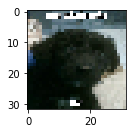

In [9]:
path = '/Users/filipetheodoro/Ai/DeepLearning/Deep Learning course - Capstone Project/teste.jpeg'
test_image = cv2.imread(path)
im_resize = cv2.resize(test_image,img_shape, interpolation=cv2.INTER_CUBIC)
image_stack = []
image_stack.append(im_resize)
# image_stack.append(X_train[30])
y_test_pred = model.predict_classes(np.array(image_stack), verbose=0)

if y_test_pred[0] == 0:
    print("É cachorro!")
else:
    print("É gato!")
    
fig1 = plt.figure() 
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(image_stack[0])
plt.show()

## Evaluate the model

In [ ]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [21]:
height = 32
width = 32
channels = 3
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 5
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 5
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool1_fmaps = conv2_fmaps

n_fc1 = 32
fc1_dropout_rate = 0.4

n_outputs = 32

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None, 2], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.elu, name="conv1")

with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
#   pool1_flat = tf.reshape(pool1, shape=[-1, pool1_fmaps * 14 * 14])
#   pool1_flat_drop = tf.layers.dropout(pool1_flat, conv2_dropout_rate, training=training)

conv2 = tf.layers.conv2d(pool1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.elu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
#         pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.elu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

ValueError: Rank mismatch: Rank of labels (received 2) should equal rank of logits minus 1 (received 2).

In [ ]:
n_epochs = [100, 200, 300]
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for n_epoch in n_epochs:
        print("Running model with {} epochs.".format(n_epoch))
        for epoch in range(n_epoch):
            for iteration in range(mnist.train.num_examples // batch_size):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
                if iteration % check_interval == 0:
                    loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                    y: mnist.validation.labels})
                    if loss_val < best_loss_val:
                        best_loss_val = loss_val
                        checks_since_last_progress = 0
                        best_model_params = get_model_params()
                    else:
                        checks_since_last_progress += 1
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                               y: mnist.validation.labels})
            print("Epoch {} of {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                      epoch, n_epoch, acc_train * 100, acc_val * 100, best_loss_val))
            if checks_since_last_progress > max_checks_without_progress:
                print("Early stopping!")
                break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

### Run the tensorflow model

This section will use the model defined by the student and run the training and evaluation step

In [5]:
#X_train = np.array((X_train/255.0),dtype=np.float16)
#X_test = np.array((X_test/255.0), dtype=np.float16)
X_train = np.array((X_train/255.0),dtype=np.float32)
X_test = np.array((X_test/255.0), dtype=np.float32)

pets_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/pets_convnet_model")
#pets_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn)
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_train}, y=y_train, batch_size=10,
                                                      num_epochs=None, shuffle=True)
pets_classifier.train(input_fn=train_input_fn, steps=num_steps, hooks=[logging_hook])
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, y=y_test, num_epochs=1,shuffle=False)
eval_results = pets_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/pets_convnet_model', '_keep_checkpoint_max': 5}
dense shape (10, 32)
logits shape (10, 2)
labels shape (10,)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/pets_convnet_model\model.ckpt-900
INFO:tensorflow:Saving checkpoints for 901 into /tmp/pets_convnet_model\model.ckpt.
INFO:tensorflow:step = 901, loss = 0.0187773
INFO:tensorflow:probabilities = [[ 0.00206337  0.99793661]
 [ 0.00148379  0.99851626]
 [ 0.9898901   0.01010988]
 [ 0.99925309  0.00074691]
 [ 0.08117108  0.91882885]
 [ 0.02973635  0.9702636 ]
 [ 0.99679643  0.00320353]
 [ 0.02872127  0.97127873]
 [ 0.0007444   0.9992556 ]
 [ 0.02505689  0.97494304]]
INFO:tensorflow:probabilities = [[ 0.99930084  0.0006992 ]
 [ 0.9

In [14]:
e = list(enumerate(labels))
print(e)
y_test[11]

[(0, 'cats'), (1, 'dogs')]


array([1, 0])

In [13]:
y_test_pred = model.predict_classes(X_test, verbose=0)
print('First 3 predictions: ', y_test_pred[:])
print('First 3 animals: ', y_test[:10])

First 3 predictions:  [0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1]
First 3 animals:  [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


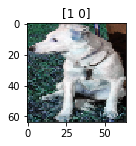

In [12]:
foto = 18
fig1 = plt.figure() 
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(X_test[foto])
plt.title(y_test[foto])
plt.show()

array([0])

In [26]:
type(y_test[10:].shape)

tuple

In [34]:
np.array(im_resize).shape

TypeError: data type not understood

In [29]:
X_test.shape

(20, 28, 28, 3)

In [36]:
type(X_test[0])

numpy.ndarray

In [1]:
from keras import backend

backend.clear_session()





/Users/filipetheodoro/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
